# Análise exploratória do Campeonato Brasileiro de Pontos Corridos Série A [2003-2020]
###### *Tem como finalidade exibir algumas análises relacionadas aos campeonatos brasileiros de futebol realizados como forma de pontos ocorridos*

![](https://imagens.ebc.com.br/aw-I_Y2OkUmA5Cdd6ZJmEYb1tko=/1170x700/smart/https://agenciabrasil.ebc.com.br/sites/default/files/thumbnails/image/trofeu_campeonato_brasileiro_serie_a.jpeg?itok=uQmZd0io)


**DataSets**
*   [campeonato-brasileiro-pontos-corridos-2003-2020-periodo.csv](https://https://drive.google.com/file/d/1wnZMArBlkEHt9bkaOF3mrNYagjtfWmBC/view?usp=sharing)
*   [campeonato-brasileiro-pontos-corridos-2003-2020-jogos.csv](https://drive.google.com/file/d/1wnZMArBlkEHt9bkaOF3mrNYagjtfWmBC/view?usp=sharing)


**Referências dos DataSets**
* https://github.com/adaoduque/Brasileirao_Dataset
* https://pt.wikipedia.org/wiki/Campeonato_Brasileiro_de_Futebol_de_2003

In [2]:
import pandas as pd
import warnings as wa

wa.simplefilter( action='ignore', category= FutureWarning)
pd.options.mode.chained_assignment = None

In [3]:
### carrega datasets
df_periodo = pd.read_csv("/content/sample_data/campeonato-brasileiro-pontos-corridos-2003-2020-periodo.csv", delimiter=";")
df_jogos   = pd.read_csv("/content/sample_data/campeonato-brasileiro-pontos-corridos-2003-2020-jogos.csv", delimiter=";")

In [4]:
### padroniza caixa dos nomes das variáveis
df_periodo.columns = df_periodo.columns.str.lower()
df_jogos.columns   = df_jogos.columns.str.lower()

In [5]:
### altera campos de datas de character para date
df_periodo['inicio'] = pd.to_datetime(df_periodo['inicio'], format="%d/%m/%Y")
df_periodo['fim'   ] = pd.to_datetime(df_periodo['fim'   ], format="%d/%m/%Y")

df_jogos['data'] = pd.to_datetime(df_jogos['data'], format="%d/%m/%Y")


In [6]:
### captalizar strings
df_jogos['dia'      ] = df_jogos['dia'      ].str.title()
df_jogos['mandante' ] = df_jogos['mandante' ].str.title()
df_jogos['visitante'] = df_jogos['visitante'].str.title()
df_jogos['vencedor' ] = df_jogos['vencedor' ].str.title()
df_jogos['arena'    ] = df_jogos['arena'    ].apply(lambda x: x.title())

In [7]:
### junta os datasets e retorna apenas os registros corretos criados na junção
df_periodo['key'] = 1
df_jogos['key'] = 1

df = pd.merge(df_periodo, df_jogos, on ='key').drop("key", 1)
df = df.query('data >= inicio & data <= fim')

In [8]:
df

,torneio,inicio,fim,rodada,data,horário,dia,mandante,visitante,vencedor,arena,mandante placar,visitante placar,estado mandante,estado visitante,estado vencedor
0,BRA2003,2003-03-29,2003-12-14,1,2003-03-29,16h00,Sábado,Athlético-Pr,Grêmio,Athlético-Pr,Arena Da Baixada,2,0,PR,RS,PR
1,BRA2003,2003-03-29,2003-12-14,1,2003-03-29,16h00,Sábado,Guarani,Vasco,Guarani,Brinco De Ouro,4,2,SP,RJ,SP
2,BRA2003,2003-03-29,2003-12-14,1,2003-03-30,16h00,Domingo,Fortaleza,Bahia,-,Castelão,0,0,CE,BA,-
3,BRA2003,2003-03-29,2003-12-14,1,2003-03-30,16h00,Domingo,Flamengo,Coritiba,-,Maracanã,1,1,RJ,PR,-
4,BRA2003,2003-03-29,2003-12-14,1,2003-03-30,16h00,Domingo,Vitória,Figueirense,-,Barradão,1,1,ES,SC,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130783,BRA2020,2020-08-08,2021-02-25,38,2021-02-25,21:30,Quinta-Feira,Internacional,Corinthians,-,Beira Rio,0,0,RS,SP,-
130784,BRA2020,2020-08-08,2021-02-25,38,2021-02-25,21:30,Quinta-Feira,Bahia,Santos,Bahia,Itaipava Arena Fonte Nova,2,0,BA,SP,BA
130785,BRA2020,2020-08-08,2021-02-25,38,2021-02-25,21:30,Quinta-Feira,Athlético-Pr,Sport,Athlético-Pr,Arena Da Baixada,2,0,PR,PE,PR
130786,BRA2020,2020-08-08,2021-02-25,38,2021-02-25,21:30,Quinta-Feira,Ceará,Botafogo-Rj,Ceará,Castelão,2,1,CE,RJ,CE


In [9]:
###### ANÁLISES ######
### GOLS POR EDIÇÃO
gols_mandante = df[['torneio', 'mandante placar']].groupby('torneio').agg(lambda x: sum(x)).reset_index()
gols_mandante.rename(columns = {"mandante placar": "gols_mandante"}, inplace=True)

gols_visitante = df.groupby('torneio')['visitante placar'].sum().sort_values(ascending=False).reset_index()
gols_visitante.rename(columns = {"visitante placar": "gols_visitante"}, inplace=True)

gols_edicao = pd.merge(gols_mandante, gols_visitante, on="torneio")

gols_edicao['gols_total'          ] = gols_edicao['gols_mandante'] + gols_edicao['gols_visitante']
gols_edicao['gols_mandante_perc'  ] = (gols_edicao['gols_mandante' ]/gols_edicao['gols_total'])*100
gols_edicao['gols_visitantes_perc'] = (gols_edicao['gols_visitante']/gols_edicao['gols_total'])*100

gols_edicao

,torneio,gols_mandante,gols_visitante,gols_total,gols_mandante_perc,gols_visitantes_perc
0,BRA2003,982,610,1592,61.683417,38.316583
1,BRA2004,947,587,1534,61.734029,38.265971
2,BRA2005,835,616,1451,57.546520,42.453480
3,BRA2006,604,426,1030,58.640777,41.359223
4,BRA2007,638,414,1052,60.646388,39.353612
5,BRA2008,654,376,1030,63.495146,36.504854
6,BRA2009,659,435,1094,60.237660,39.762340
7,BRA2010,581,397,978,59.406953,40.593047
8,BRA2011,610,407,1017,59.980334,40.019666
9,BRA2012,559,380,939,59.531416,40.468584


In [10]:
### Melhores ataques por edição
df['clube']                  = df['mandante']
gols_clubes_mandantes        = df.groupby(['torneio','clube'])['mandante placar'].sum().sort_values(ascending=False).reset_index()
gols_clubes_mandantes.rename(columns = {"mandante placar": "gols_mandante"}, inplace=True)

df['clube']                  = df['visitante']
gols_clubes_visitantes       = df.groupby(['torneio','clube'])['visitante placar'].sum().sort_values(ascending=False).reset_index()
gols_clubes_visitantes.rename(columns = {"visitante placar": "gols_visitante"}, inplace=True)

gols_clubes               = pd.merge(gols_clubes_mandantes, gols_clubes_visitantes,  on=["torneio","clube"])
gols_clubes['gols_total'] = gols_clubes['gols_mandante'] + gols_clubes['gols_visitante']

ataque_pior   = gols_clubes.groupby('torneio')['gols_total'].min().sort_values(ascending=False).reset_index()
ataque_melhor = gols_clubes.groupby('torneio')['gols_total'].max().sort_values(ascending=False).reset_index()

gols_torneio_ataque_pior = pd.merge(gols_clubes, ataque_pior, on=['torneio','gols_total'])[['torneio','clube','gols_total']]
gols_torneio_ataque_pior.rename(columns = {"gols_total": "ataque_pior"}, inplace=True)
gols_torneio_ataque_pior

gols_torneio_ataque_melhor = pd.merge(gols_clubes, ataque_melhor, on=['torneio','gols_total'])[['torneio','clube','gols_total']]
gols_torneio_ataque_melhor.rename(columns = {"gols_total": "ataque_melhor"}, inplace=True)
gols_torneio_ataque_melhor

gols_ataques = pd.merge(gols_torneio_ataque_melhor, gols_torneio_ataque_pior, on="torneio", suffixes=("_melhor","_pior"))
gols_ataques.sort_values(['torneio','clube_melhor'])

,torneio,clube_melhor,ataque_melhor,clube_pior,ataque_pior
2,BRA2003,Cruzeiro,102,Vitória,50
0,BRA2004,Santos,103,Ponte Preta,43
1,BRA2004,Santos,103,Guarani,43
5,BRA2005,Corinthians,87,Brasiliense,49
16,BRA2006,São Paulo,66,São Caetano,37
7,BRA2007,Cruzeiro,74,América-Rn,24
13,BRA2008,Flamengo,67,Ipatinga,37
4,BRA2009,Grêmio,67,Athlético-Pr,42
15,BRA2010,Grêmio,68,Guarani,33
17,BRA2011,Fluminense,60,Athlético-Pr,38


In [11]:
# Pontuação
pontos_participantes               = df.groupby('torneio')['mandante'].nunique().sort_values(ascending=False).reset_index()
pontos_participantes['pontos_max'] = (pontos_participantes.mandante - 1)*2*3

pontos = df[['torneio', 'mandante', 'visitante', 'mandante placar', 'visitante placar']]

pontos['pontos_mandante' ] = pontos.apply(lambda x: 3 if x['mandante placar'] > x['visitante placar'] else (0 if x['mandante placar'] < x['visitante placar'] else 1), axis=1)
pontos['pontos_visitante'] = pontos.apply(lambda x: 3 if x['mandante placar'] < x['visitante placar'] else (0 if x['mandante placar'] > x['visitante placar'] else 1), axis=1)

pontos_mandantes = pontos.groupby(['torneio','mandante' ])['pontos_mandante' ].sum().sort_values(ascending=False).reset_index()
pontos_visitante = pontos.groupby(['torneio','visitante'])['pontos_visitante'].sum().sort_values(ascending=False).reset_index()

pontos_mandantes.rename(columns = {"mandante": "clube"}, inplace=True)
pontos_visitante.rename(columns = {"visitante": "clube"}, inplace=True)

pontos_total = pd.merge(pontos_mandantes, pontos_visitante, on=['torneio','clube'])
pontos_total['pontos_total'] = pontos_total.pontos_mandante + pontos_total.pontos_visitante

In [12]:
### maior pontuador de todas as edições
pontos_total[pontos_total['pontos_total'] == pontos_total['pontos_total'].max()]

,torneio,clube,pontos_mandante,pontos_visitante,pontos_total
2,BRA2003,Cruzeiro,56,44,100


In [13]:
### menor pontuador de todas as edições
pontos_total[pontos_total['pontos_total'] == pontos_total['pontos_total'].min()]

,torneio,clube,pontos_mandante,pontos_visitante,pontos_total
369,BRA2007,América-Rn,9,8,17


In [14]:
### Campeões
campeoes = pontos_total.groupby('torneio')['pontos_total'].max().reset_index()
campeoes.rename(columns = {"pontos_total": "maior_ponto"}, inplace=True)
campeoes = pd.merge(campeoes, pontos_total, left_on=['torneio','maior_ponto'], right_on=['torneio','pontos_total'])

campeoes = pd.merge(campeoes, pontos_participantes, on='torneio')
campeoes['aproveitamento'] = (campeoes.pontos_total / campeoes.pontos_max)*100
campeoes['ano'] = campeoes['torneio'].str.extract('(\d+)').astype(int)
campeoes

,torneio,maior_ponto,clube,pontos_mandante,pontos_visitante,pontos_total,mandante,pontos_max,aproveitamento,ano
0,BRA2003,100,Cruzeiro,56,44,100,24,138,72.463768,2003
1,BRA2004,89,Santos,56,33,89,24,138,64.492754,2004
2,BRA2005,81,Corinthians,42,39,81,22,126,64.285714,2005
3,BRA2006,78,São Paulo,46,32,78,20,114,68.421053,2006
4,BRA2007,77,São Paulo,42,35,77,20,114,67.543860,2007
5,BRA2008,75,São Paulo,46,29,75,20,114,65.789474,2008
6,BRA2009,67,Flamengo,40,27,67,20,114,58.771930,2009
7,BRA2010,71,Fluminense,41,30,71,20,114,62.280702,2010
8,BRA2011,71,Corinthians,41,30,71,20,114,62.280702,2011
9,BRA2012,77,Fluminense,38,39,77,20,114,67.543860,2012


In [15]:
### campeões com a maior e menor pontuação
campeoes_pontuacao = campeoes[['torneio', 'clube', 'pontos_total', 'aproveitamento']]
campeoes_pontuacao['maior_ponto'] = campeoes_pontuacao.pontos_total.max()
campeoes_pontuacao['menor_ponto'] = campeoes_pontuacao['pontos_total'].min()
campeoes_pontuacao = campeoes_pontuacao.query('pontos_total == maior_ponto or pontos_total == menor_ponto')
campeoes_pontuacao['observacao'] = campeoes_pontuacao.apply(lambda x: 'Campeão com a maior pontuação' if x['pontos_total'] == x['maior_ponto'] else 'Campeão com a menor pontuação', axis=1)
campeoes_pontuacao = campeoes_pontuacao[['torneio', 'clube', 'pontos_total', 'observacao']]

campeoes_pontuacao




,torneio,clube,pontos_total,observacao
0,BRA2003,Cruzeiro,100,Campeão com a maior pontuação
6,BRA2009,Flamengo,67,Campeão com a menor pontuação


In [16]:
### campeões com o maior e menor aproveitamento
campeoes_aproveitamento = campeoes[['torneio', 'clube', 'pontos_total', 'aproveitamento']]
campeoes_aproveitamento['maior_aproveitamento'] = campeoes_aproveitamento.aproveitamento.max()
campeoes_aproveitamento['menor_aproveitamento'] = campeoes_aproveitamento['aproveitamento'].min()
campeoes_aproveitamento = campeoes_aproveitamento.query('aproveitamento == maior_aproveitamento or aproveitamento == menor_aproveitamento')
campeoes_aproveitamento['observacao'] = campeoes_aproveitamento.apply(lambda x: 'Campeão com o maior aproveitamento' if x['aproveitamento'] == x['maior_aproveitamento'] else 'Campeão com o menor aproveitamento', axis=1)
campeoes_aproveitamento = campeoes_aproveitamento[['torneio', 'clube', 'aproveitamento', 'observacao']]
campeoes_aproveitamento

,torneio,clube,aproveitamento,observacao
6,BRA2009,Flamengo,58.771930,Campeão com o menor aproveitamento
16,BRA2019,Flamengo,78.947368,Campeão com o maior aproveitamento


In [18]:
import seaborn as sns

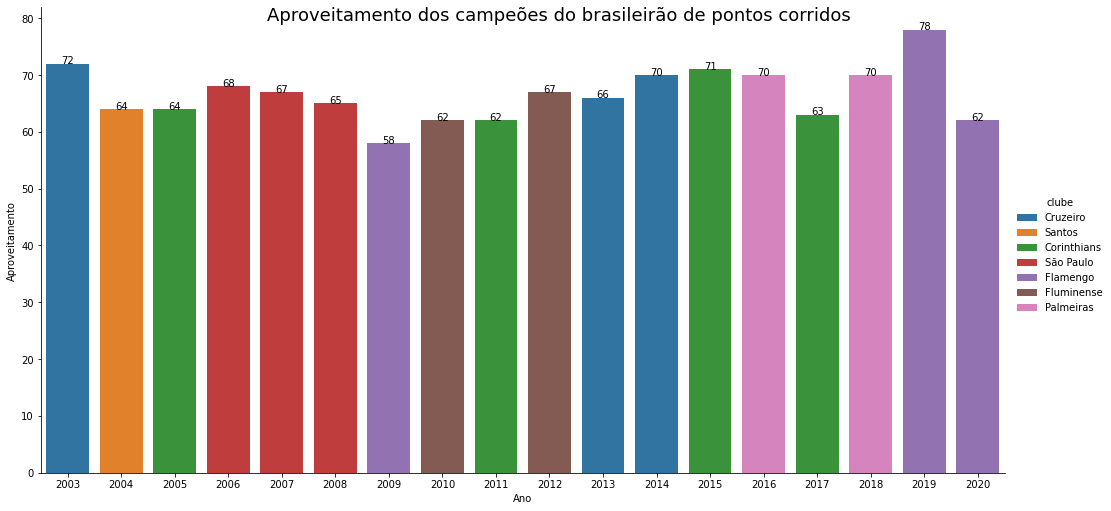

In [22]:
campeoes['aprov'] = campeoes.aproveitamento.astype(int)

g = sns.catplot(x='ano',y='aprov', data=campeoes, hue='clube', dodge=False, kind='bar', height=7, aspect=2)
g.set_axis_labels('Ano','Aproveitamento')
g.fig.suptitle('Aproveitamento dos campeões do brasileirão de pontos corridos', ha='center', fontsize=18)

for index, row in campeoes.iterrows():
    g.ax.text(row.name, row.aprov, row.aprov, color='black', ha="center")
  